# 경통분 hw1

MFE 20249433 최재필

In [5]:
import seaborn as sns

import numpy as np
import pandas as pd

## 1. 

- numerical 
    - discrete
    - continuous
- categorical
    - nominal
    - ordinal

뷴류하시오

- a. numerical / discrete
- b. numerical / continuous
- c. categorical / ordinal
- d. numerical / continuous
- e. categorical / ordinal
- f. numerical / continous
- g. numerical / discrete
- h. numerical / discrete
- i. categorical / nominal
- j. numerical / continuous


## 2. 

In [1]:
data = [
    0.0, 0.0, 0.04, 0.21, 0.29, 0.54, 0.63, 0.88, 0.96, 1.25, 1.67, 1.75, 1.84, 1.96,
    2.01, 2.51, 2.72, 3.3, 3.51, 4.05, 4.85, 6.94, 8.73, 10.57, 11.11, 12.45, 14.0,
    17.3, 17.92, 18.05, 18.43, 22.48, 22.48, 23.48, 26.32, 26.45, 28.87,
    ]


### a. 

Plot the data in a histogram and describe the shape of the frequency distribution. 

<Axes: ylabel='Count'>

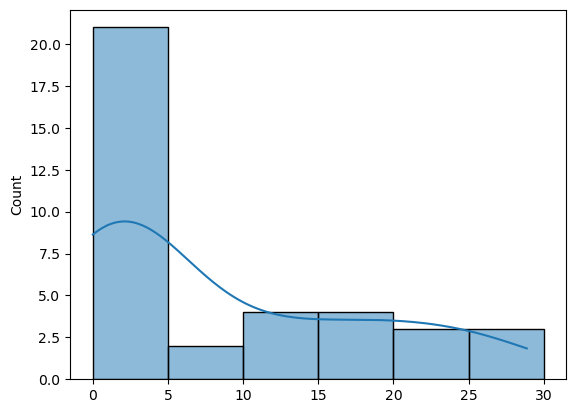

In [3]:
sns.histplot(data, kde=True, binrange=(0, 30), bins=6)

- Shape of the distribution: 
    - 0~5 사이의 빈도가 매우 높고 나머지는 상대적으로 평평함. 
        - Skewed to the right
    - 전체 분포를 너무 크게 벗어나는 outlier가 존재하진 않음. 

### b. 

Approximate the mean and median of the distribution. Which should be greater? Explain your reasoning. 

- Visual approximation:
    - Mean > Median 
- Explain my reasoning:
    - 

In [6]:
mean = np.mean(data)
mean

8.663513513513513

In [7]:
median = np.median(data)
median

3.51